In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
eta = 0.8
kappa = 0.01
epsilon = 1e-6

phimin = eta*(1-eta)/(1+eta) + epsilon
phimax = 1-eta - epsilon
#phimin = 0.015

In [5]:
phi_0 = 0.1
r = 0.006
y  = 0.005
u_0 =   1/(1-eta)
v_0 = (1-phi_0*u_0)*(1+eta*u_0)

In [6]:
phi02=0.108
u02 = 4.6
v02 = (1-phi02*u02)*(1+eta*u02)
v02

2.354976

In [7]:
from scipy.integrate import solve_ivp

def F(t,x):
    #phimin = eta*(1-eta)/(1+eta) 
    phimax = 1-eta 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    if x[2] <= phimin or x[2] >= phimax:
        dphi = 0
    else:
        dphi = r
    return [du,dv,dphi]




sol = solve_ivp(F, [0, 2], [u_0,v_0,phi_0],method='BDF',atol=1e-10,rtol=1e-8)
sol2 = solve_ivp(F, [0, 100], [u02,v02,phi02],method='BDF',atol=1e-10,rtol=1e-8)
sol4 = solve_ivp(F, [0, 100], [3,3,phimin],method='BDF',atol=1e-10,rtol=1e-10)


In [8]:
mu = 0.006
eta = 0.8
u = (eta-1-mu+np.sqrt((1-eta+mu)**2+8*eta*mu))/(4*eta*mu)
phi_star = eta/(1+2*eta*u)

In [9]:
phimax = 1-eta
phimin = eta*(1-eta)/(1+eta)

In [10]:
phimin

0.08888888888888888

In [11]:
def G(t,x):
    dx = x[0]*(1-x[1]*x[0])+mu*x[0]*(1+eta*x[0])-(1-x[1]*x[0])*(1+eta*x[0])
    dphi = 2*x[1]*eta*((eta-x[1])/(2*eta*x[1])-x[0])*mu
    return [-dx,-dphi]

def G_2(t,x):
    dx = x[0]*(1-x[1]*x[0])+mu*x[0]*(1+eta*x[0])-(1-x[1]*x[0])*(1+eta*x[0])
    dphi = 2*x[1]*eta*((eta-x[1])/(2*eta*x[1])-x[0])*mu
    return [dx,dphi]

In [12]:
phi=phi_star
J = np.array([[(1-eta+phi+mu)+2*u*(eta*phi-phi+eta*mu),-u**2+eta*u**2+u],[-2*eta*phi*mu,-2*eta*mu*(1/(2*eta)+u)]],dtype=float)

In [13]:
eigs = np.linalg.eig(J)

In [16]:
eigs

(array([ 0.1745343 , -0.04166854]),
 array([[ 0.99998921, -0.95981173],
        [-0.00464466,  0.28064469]]))

In [18]:
m = eigs[1][0][1]/eigs[1][1][1]
m_2 = eigs[1][0][0]/eigs[1][1][0]
#u_vals = np.linspace(-3,3,510)+u
phi_vals_2 = np.linspace(-0.2,0.2,510)+phi

u_vals_1 =  u + m*(phi_vals_2-phi)
u_vals_2 = u + m_2*(phi_vals_2-phi)
#phi_vals_1 = phi + m*(u_vals-u)
#phi_vals_2 = phi+ m_2*(u_vals-u)

In [19]:
from scipy.integrate import solve_ivp

sol_n = solve_ivp(G, [0, 100], [4,0.1],method='BDF')

In [20]:
x_vals = np.linspace(u-1,u+1,7)
phi_vals = np.linspace(phi_star-0.1,phi_star+0.1,7)
phi_vals_3 = np.linspace(phi_star-0.1,phi_star+0.1,101)
x_f_vals = (eta-phi_vals_3)/(2*eta*phi_vals_3)

In [21]:
sols = np.zeros([36,2,101])
sols_2 = np.zeros([36,2,101])
t = np.linspace(0,30,101)
t2 = np.linspace(0,10,101)
for i in range(6):
    for j in range(6):
        sols[6*i+j]= solve_ivp(G, [0, 30], [x_vals[i],phi_vals[j]],t_eval=t,method='BDF',atol=1e-10,rtol=1e-8).y
        sols_2[6*i+j]= solve_ivp(G_2, [0, 10], [x_vals[i],phi_vals[j]],t_eval=t2,method='BDF',atol=1e-10,rtol=1e-8).y

In [23]:
def arrow_numbers(p,q):
    i =50
    x_i = p[i]
    y_i = q[i]
    dx_i = p[i+1]-p[i]
    dy_i = q[i+1]-q[i]
    return x_i,y_i,dx_i,dy_i

C:\Users\brian\AppData\Local\Temp\ipykernel_16352\1596135357.py:8: RuntimeWarning: divide by zero encountered in true_divide
  dphi = 2*x[1]*eta*((eta-x[1])/(2*eta*x[1])-x[0])*mu
C:\Users\brian\AppData\Local\Temp\ipykernel_16352\1596135357.py:8: RuntimeWarning: invalid value encountered in multiply
  dphi = 2*x[1]*eta*((eta-x[1])/(2*eta*x[1])-x[0])*mu


Text(4.5, 0.15, 'Attracting Region')

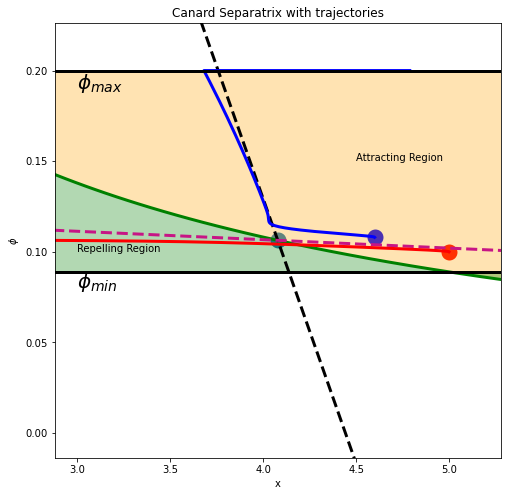

In [24]:
plt.figure(figsize=(8,8))
#for k in range(len(sols)):
#    plt.plot(sols[k][0],sols[k][1],color='b',alpha=0.4)
#    plt.plot(sols_2[k][0],sols_2[k][1],color='b',alpha=0.4)
    
plt.plot(x_f_vals,phi_vals_3,color='g',linewidth=3,label="Fold Curve")
plt.ylim([phi_star-0.12,phi_star+0.12])
plt.xlim([u-1.2,u+1.2])
plt.plot(u_vals_1,phi_vals_2,'k--',linewidth=3,label="Positive Eigenvector")
plt.plot(u_vals_2,phi_vals_2,linestyle='--',color='mediumvioletred',linewidth=3,label="Negative Eigenvector")
plt.scatter(u,phi,linewidth=10,label="Canard Point")
plt.plot(sol.y[0],sol.y[2],linewidth=3,color='r')
plt.plot(sol2.y[0],sol2.y[2],linewidth=3,color='b')
plt.scatter(u_0,phi_0,linewidth=10,label="IC Canard",color='r')
plt.scatter(u02,phi02,linewidth=10,label="IC Normal",color='b')
arrow_sol1 = arrow_numbers(sols[0][0],sols[0][1])
arrow_sol2 = arrow_numbers(sols[1][0],sols[1][1])
arrow_sol3 = arrow_numbers(sols[2][0],sols[2][1])
arrow_sol4 = arrow_numbers(sols[3][0],sols[3][1])
arrow_sol5 = arrow_numbers(sols[4][0],sols[4][1])
arrow_sol6 = arrow_numbers(sols[5][0],sols[5][1])
arrow_sol7 = arrow_numbers(sols[6][0],sols[6][1])
arrow_sol8 = arrow_numbers(sols[7][0],sols[7][1])
#plt.arrow(arrow_sol1[0],arrow_sol1[1],arrow_sol1[2],arrow_sol1[3],width=0.001)
#plt.arrow(arrow_sol2[0],arrow_sol2[1],arrow_sol2[2],arrow_sol2[3],width=0.04)
#plt.arrow(arrow_sol3[0],arrow_sol3[1],arrow_sol3[2],arrow_sol3[3],width=0.04)

#plt.arrow(arrow_sol5[0],arrow_sol5[1],arrow_sol5[2],arrow_sol5[3],width=0.04)
#plt.arrow(arrow_sol6[0],arrow_sol6[1],arrow_sol6[2],arrow_sol6[3],width=0.04)
#plt.arrow(arrow_sol7[0],arrow_sol7[1],arrow_sol7[2],arrow_sol7[3],width=0.04)
#plt.arrow(arrow_sol8[0],arrow_sol8[1],arrow_sol8[2],arrow_sol8[3],width=0.04)

X1,Y1 = np.meshgrid(np.linspace(3,4,4),np.linspace(0,0.1,4))
X2,Y2 = np.meshgrid(np.linspace(4,5,4),np.linspace(0,0.08,4))
X3,Y3 = np.meshgrid(np.linspace(3,4,4),np.linspace(0.15,0.2,4))
X4,Y4 = np.meshgrid(np.linspace(4.2,5,4),np.linspace(0.1,0.2,4))
plt.axhline(phimin,linewidth=3,label="$\phi_{min}$",color='k')
plt.text(3,0.19,"$\phi_{max}$",fontsize=20)
plt.axhline(phimax,linewidth=3,label="$\phi_{max}$",color='k')
plt.text(3,0.08,"$\phi_{min}$",fontsize=20)
U1,V1 = G_2(0,[X1,Y1])
U2,V2 = G_2(0,[X2,Y2])
U3,V3 = G(0,[X3,Y3])
U4,V4 = G(0,[X4,Y4])
#plt.quiver(X1,Y1,U1,V1,alpha=0.4)
#plt.quiver(X2,Y2,U2,V2,alpha=0.4)
#plt.quiver(X3,Y3,U3,V3,alpha=0.4)
#plt.quiver(X4,Y4,U4,V4,alpha=0.4)
plt.title("Canard Separatrix with trajectories")
plt.xlabel("x")
plt.ylabel("$\phi$")
plt.fill_between(x_f_vals,phi_vals_3,0.2,alpha=0.3,label="Attracting Region",color='orange')
plt.fill_between(x_f_vals,phimin,phi_vals_3,alpha=0.3,label="Repelling Region",color='g')
plt.text(3,0.1,"Repelling Region")
plt.text(4.5,0.15,"Attracting Region")
#plt.legend(loc='lower left')
#plt.ylim(0,phimax)
#plt.savefig("Separatrix_with_Trajectories")

In [24]:
def v(x,y):
    return 1+(eta-y)*x-eta*y*x**2

In [25]:
PHI3 = np.arange(0.1,0.2,0.02)
xline = (eta-PHI3)/(2*eta*PHI3)
zline = (eta+PHI3)**2/(4*eta*PHI3)

NameError: name 'phi_vals_1' is not defined

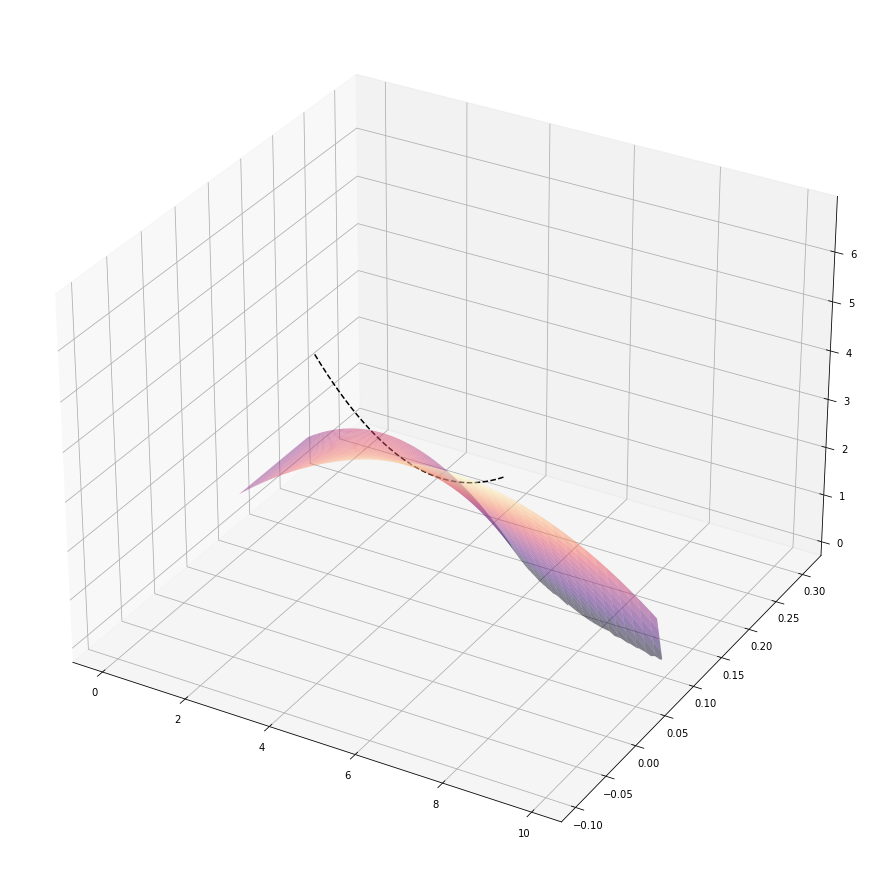

In [26]:
from matplotlib import cm
epsilon = 1e-6
fig = plt.figure(figsize = (20,16))
ax = fig.add_subplot(111,projection='3d')
#phimin = 0.05
phimin = eta*(1-eta)/(1+eta) + epsilon
phimax = 1-eta - epsilon
u = np.arange(0,10,0.125/2)
phi  = np.arange(phimin,phimax,0.001)
U, PHI = np.meshgrid(u,phi)
V = (1-PHI*U)*(1+eta*U)
V_max = np.where(V<0,None,V)
surf = ax.plot_surface(U,PHI,V_max, cmap=cm.magma,linewidth=0, antialiased=True,alpha=0.5,label="Critical_Manifold")
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d

ax.plot3D(u_vals_1,phi_vals_2,v(u_vals_1,phi_vals_2),'k--')
ax.plot3D(u_vals_1,phi_vals_1,1,'r--')
ax.plot3D(xline,PHI3,zline,'g')
#ax.set_xlim(3,5)
#ax.set_zlim(0,5)
#ax.set_ylim(0,0.2)
ax.view_init(elev=20, azim=70)

ValueError: x and y must have same first dimension, but have shapes (7,) and (101,)

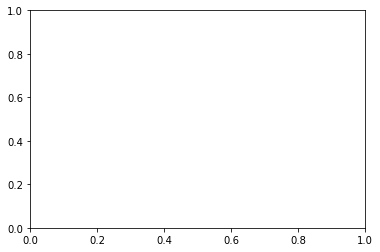

In [27]:
plt.plot(phi_vals,x_f_vals)

In [ ]:
arrow_sol1 = arrow_numbers(sols[0][0],sols[0][1])
arrow_sol2 = arrow_numbers(sols[1][0],sols[1][1])
arrow_sol3 = arrow_numbers(sols[2][0],sols[2][1])
arrow_sol4 = arrow_numbers(sols[3][0],sols[3][1])
arrow_sol5 = arrow_numbers(sols[4][0],sols[4][1])
arrow_sol6 = arrow_numbers(sols[5][0],sols[5][1])
arrow_sol7 = arrow_numbers(sols[6][0],sols[6][1])
arrow_sol8 = arrow_numbers(sols[7][0],sols[7][1])
plt.arrow(arrow_sol1[0],arrow_sol1[1],arrow_sol1[2],arrow_sol1[3],width=0.04)
plt.arrow(arrow_sol2[0],arrow_sol2[1],arrow_sol2[2],arrow_sol2[3],width=0.04)
plt.arrow(arrow_sol3[0],arrow_sol3[1],arrow_sol3[2],arrow_sol3[3],width=0.04)
plt.arrow(arrow_sol4[0],arrow_sol4[1],arrow_sol4[2],arrow_sol4[3],width=0.04)
plt.arrow(arrow_sol5[0],arrow_sol5[1],arrow_sol5[2],arrow_sol5[3],width=0.04)
plt.arrow(arrow_sol6[0],arrow_sol6[1],arrow_sol6[2],arrow_sol6[3],width=0.04)
plt.arrow(arrow_sol7[0],arrow_sol7[1],arrow_sol7[2],arrow_sol7[3],width=0.04)
plt.arrow(arrow_sol8[0],arrow_sol8[1],arrow_sol8[2],arrow_sol8[3],width=0.04)